In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
from tensorflow import keras
from keras.models import Sequential, load_model
from keras.layers import Activation, Dense, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

import matplotlib.pyplot as plt
import numpy as np

In [3]:
x_train = train_path = '/content/drive/MyDrive/Palm/train'
x_test = test_path = '/content/drive/MyDrive/Palm/test'

In [4]:
x_train = x_test = ImageDataGenerator(rescale=1/255)

train_batches = x_train.flow_from_directory( train_path, target_size=(224, 224),
                                               batch_size=10, class_mode='categorical')

test_batches = x_test.flow_from_directory(test_path, target_size=(224, 224),
                                                batch_size=10, class_mode='categorical')

Found 131 images belonging to 3 classes.
Found 13 images belonging to 3 classes.


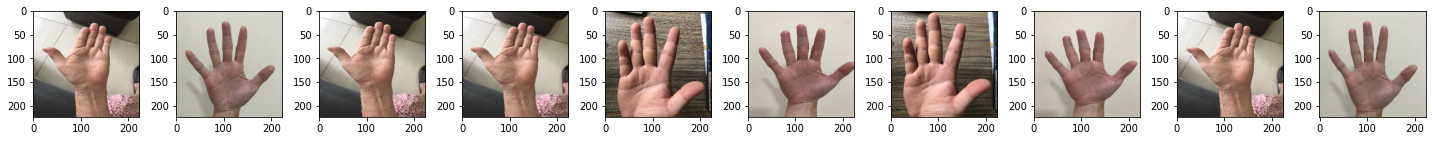

In [5]:
imgs, labels = next(test_batches)
fig, axes = plt.subplots(1, 10, figsize=(20,20))
axes = axes.flatten()

for i, ax in zip( imgs, axes):
  ax.imshow(i)
plt.tight_layout()
plt.show()

In [6]:
model=Sequential([                  
                  Conv2D(32, (3,3), activation='relu', padding = 'same', input_shape=(224,224,3)),
                  MaxPool2D(pool_size=(2,2)),

                  Conv2D(64, (3,3), activation='relu', padding = 'same'),
                  MaxPool2D(pool_size=(2, 2)),

                  Conv2D(128, (3,3), activation='relu', padding = 'same'),
                  MaxPool2D(pool_size=(2, 2)),
                  Dropout(0.2),

                  Conv2D(128, (3,3), activation='relu', padding = 'same'),
                  Flatten(), Dropout(0.5),
                  Dense(units=3, activation='softmax') ])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 128)      0

In [7]:
model.compile(optimizer = Adam(learning_rate=0.0005),
              loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x=train_batches, steps_per_epoch=len(train_batches), 
                    validation_data=test_batches, epochs=10, verbose=1)

Epoch 1/10
14/14 [==============================] - 63s 4s/step - loss: 0.9883 - accuracy: 0.6641 - val_loss: 0.4415 - val_accuracy: 1.0000
Epoch 2/10
14/14 [==============================] - 15s 1s/step - loss: 0.1383 - accuracy: 0.9847 - val_loss: 8.1112e-05 - val_accuracy: 1.0000
Epoch 3/10
14/14 [==============================] - 12s 836ms/step - loss: 1.2788e-04 - accuracy: 1.0000 - val_loss: 5.6689e-05 - val_accuracy: 1.0000
Epoch 4/10
14/14 [==============================] - 12s 834ms/step - loss: 1.0500e-05 - accuracy: 1.0000 - val_loss: 4.5850e-07 - val_accuracy: 1.0000
Epoch 5/10
14/14 [==============================] - 12s 834ms/step - loss: 1.0101e-07 - accuracy: 1.0000 - val_loss: 5.5020e-08 - val_accuracy: 1.0000
Epoch 6/10
14/14 [==============================] - 11s 816ms/step - loss: 1.0101e-07 - accuracy: 1.0000 - val_loss: 2.7510e-08 - val_accuracy: 1.0000
Epoch 7/10
14/14 [==============================] - 12s 844ms/step - loss: 5.1870e-08 - accuracy: 1.0000 - val_l

In [8]:
model.save('Palm.h5')

In [9]:
classify = load_model('Palm.h5')
dic = test_batches.class_indices
dic

{'Dad': 0, 'Grandma': 1, 'Me': 2}

Palm Reading Result: ['Grandma']


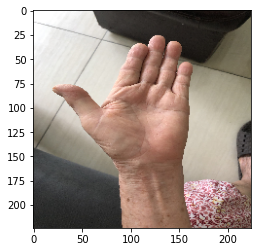

In [11]:
sample = load_img('/content/drive/MyDrive/Palm/train/Grandma/z3440659987662_a4c232a50aa8f745d15b1fff2836f98d.jpg', target_size =(224,224))
plt.imshow(sample)
sample = img_to_array(sample)
sample = sample.reshape(1,224,224,3)
sample = sample.astype('float32')
sample = sample/255

result = np.argmax(classify.predict(sample),axis= 1)
key = [k for k, v in dic.items() if v == result]
print('Palm Reading Result:', key)